# **1. Import Library**

In [19]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

In [20]:
# Memuat Dataset dari Hasil Clustering
df = pd.read_csv('clustering_pekerja.csv')

In [21]:
# Encode Seluruh kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [22]:
print(df.head())

   provinsi  tahun   upah        ump  daerah_x  jenis_x      peng  jenis_y  \
0         0   2015  11226  1900000.0         0        0  395136.0        0   
1         0   2015  11226  1900000.0         0        0  395136.0        0   
2         0   2015  11226  1900000.0         0        0  395136.0        0   
3         0   2015  11226  1900000.0         0        0  395136.0        0   
4         0   2015  11226  1900000.0         0        0  395136.0        0   

   daerah_y  periode        gk  Cluster  
0         2        0  293697.0        0  
1         2        1  302128.0        0  
2         0        0  297479.0        0  
3         0        1  306737.0        0  
4         1        0  296406.0        0  


# **3. Data Splitting**

In [23]:
# Data Splitting
X = df.drop('Cluster', axis=1)
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nJumlah Data Training:", len(X_train))
print("Jumlah Data Testing:", len(X_test))


Jumlah Data Training: 3774
Jumlah Data Testing: 944


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [24]:
# Model 1 dengan Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Model 2 dengan KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

## **b. Evaluasi Model Klasifikasi**

In [26]:
# Evaluasi Model Random Forest
y_pred_rf = rf.predict(X_test)
print("Evaluasi Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}\n")

# label cluster
unique_labels = sorted(y_test.unique())
target_names = [f"Cluster {i}" for i in unique_labels]

print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Evaluasi Random Forest
Accuracy: 0.9905
F1-Score (weighted): 0.9905

Classification Report:
              precision    recall  f1-score   support

   Cluster 0       0.99      0.99      0.99       519
   Cluster 1       0.99      0.99      0.99       425

    accuracy                           0.99       944
   macro avg       0.99      0.99      0.99       944
weighted avg       0.99      0.99      0.99       944



Confusion Matrix:
[[515   4]
 [  5 420]]


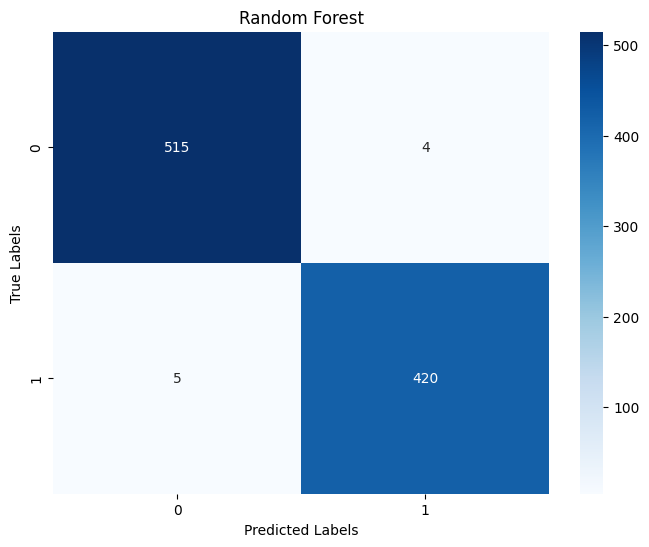

In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Plot Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(set(y)), yticklabels=list(set(y)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest")
plt.show()

In [28]:
# Evaluasi Model KNN
y_pred_knn = knn.predict(X_test)
print("Evaluasi KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_knn, average='weighted'):.4f}\n")

# Label cluster
unique_labels_knn = sorted(y_test.unique())
target_names_knn = [f"Cluster {i}" for i in unique_labels_knn]

print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=target_names_knn))

Evaluasi KNN
Accuracy: 0.9756
F1-Score (weighted): 0.9756

Classification Report:
              precision    recall  f1-score   support

   Cluster 0       0.98      0.97      0.98       519
   Cluster 1       0.97      0.98      0.97       425

    accuracy                           0.98       944
   macro avg       0.97      0.98      0.98       944
weighted avg       0.98      0.98      0.98       944



Confusion Matrix:
[[505  14]
 [  9 416]]


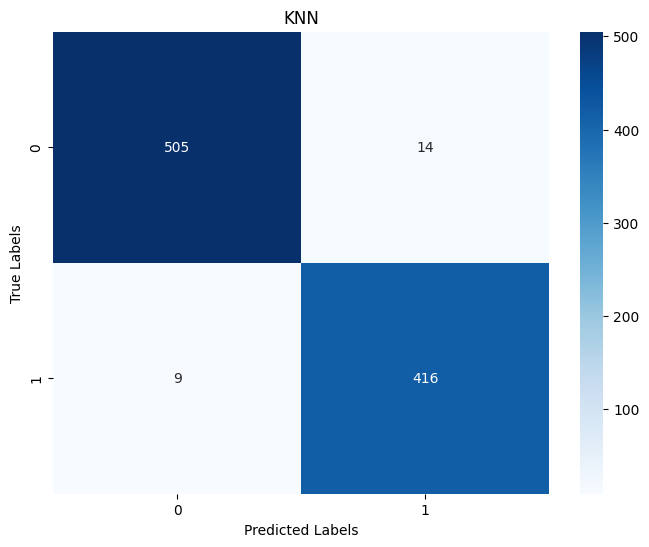

In [29]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Plot Confusion Matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(set(y)), yticklabels=list(set(y)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("KNN")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

#### 1. **Perbandingan Hasil Evaluasi**  
- **Random Forest**  
  - Akurasi: **99.05%**  
  - F1-Score: **99.05%** (Precision dan Recall Seimbang)    

- **KNN**  
  - Akurasi: **97.56%**  
  - F1-Score: **97.56%**  

---

#### 2. **Identifikasi Kelemahan Model**  
**A. Random Forest**  
- Sedikit kesalahan dalam klasifikasi (4 - 5 sampel salah prediksi)   

**B. KNN**  
- Beberapa kesalahan klasifikasi pada kedua cluster:  
  - 14 sampel Cluster 0 diprediksi sebagai Cluster 1  
  - 9 sampel Cluster 1 diprediksi sebagai Cluster 0  

**C. Overfitting/Underfitting**  
- Tidak Ada Overfitting: Akurasi pada data test sangat tinggi  
- Tidak Ada Underfitting: Model mampu membedakan pola dengan baik  

---

#### 3. **Rekomendasi**  
1. Mungkin dengan normalisasi fitur dapat meningkatkan performa KNN  
2. Melakukan pencarian K optimal menggunakan GridSearchCV  
3. Uji coba dengan algoritma lain seperti XGBoost misalnya
4. Menambah jumlah data untuk hasil yang lebih baik   

---

#### **Kesimpulan**  
- Random Forest menunjukkan performa lebih unggul dengan akurasi 99.05%  
- KNN juga cukup baik dengan akurasi 97.56%, namun lebih rendah dari Random Forest dan sensitif terhadap skala data
- Random Forest direkomendasikan sebagai model utama untuk klasifikasi klaster pekerja
